In [62]:
from fastai.vision.all import *
from fastai.data.all import *

path = untar_data(URLs.MNIST)
# path.ls() returns a list of Path objects
paths = path.ls()
for p in paths:
    print(f"- {p}")

- /Users/przemek/.fastai/data/mnist_png/training
- /Users/przemek/.fastai/data/mnist_png/testing


In [118]:
dblock = DataBlock(
  blocks = (ImageBlock(cls=PILImageBW), CategoryBlock),
  get_items = get_image_files,
  get_y=parent_label,
  splitter = GrandparentSplitter())

dsets = dblock.datasets(path)
dsets.train[0]

dsets.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

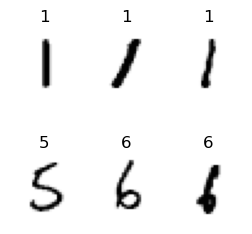

In [123]:
dls = dblock.dataloaders(path)
dls.show_batch(max_n=6, figsize=(3,3))

In [197]:
learn = vision_learner(dls=dls, arch=resnet18, lr=0.02)
learn.fine_tune(5)

epoch,train_loss,valid_loss,time
0,0.717141,0.505960,01:18


epoch,train_loss,valid_loss,time
0,0.146471,0.085326,01:40
1,0.072230,0.045938,01:36
2,0.040619,0.035121,01:37
3,0.027952,0.032978,01:28
4,0.012441,0.029753,01:23


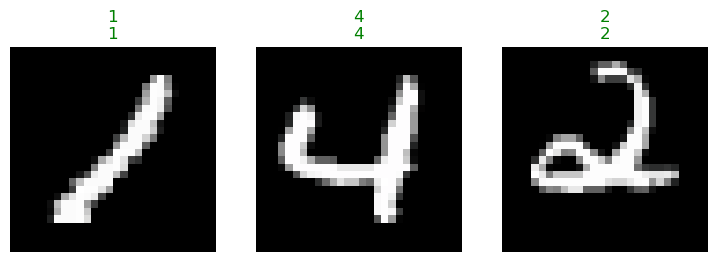

In [198]:
learn.show_results(max_n=3)

In [207]:
from PIL import Image, ImageOps, ImageEnhance

def prepare_img(base_img):
  # Invert the image first
  inverted = ImageOps.invert(base_img)
  # Enhance contrast by factor of 2
  enhancer = ImageEnhance.Contrast(inverted)
  return enhancer.enhance(4.0)

images = {
    0: prepare_img(PILImage.create('test/0.jpg')),
    3: prepare_img(PILImage.create('test/3.jpg')),
    4: prepare_img(PILImage.create('test/4.jpg')),
    5: prepare_img(PILImage.create('test/5.jpg')),
    6: prepare_img(PILImage.create('test/6.jpg')),
    8: prepare_img(PILImage.create('test/8.jpg'))
}

successful_predictions = 0;

for k, v in images.items():
  category = learn.predict(v)[0];
  print(f"{k} recognized as {category}");
  if str(k) == category:
    successful_predictions += 1;

print(f"Success {len(images.items()) / successful_predictions * 100}%")

0 recognized as 0


3 recognized as 3


4 recognized as 4


5 recognized as 5


6 recognized as 6


8 recognized as 8
Success 100.0%
